# Q1
Consider the two DataFrames shown below, both of which have Name as the index. Which of the following expressions can be used to get the data of all students (from student_df) including their roles as staff, where nan denotes no role? [MergingDataFrame_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/MergingDataFrame_ed.ipynb)
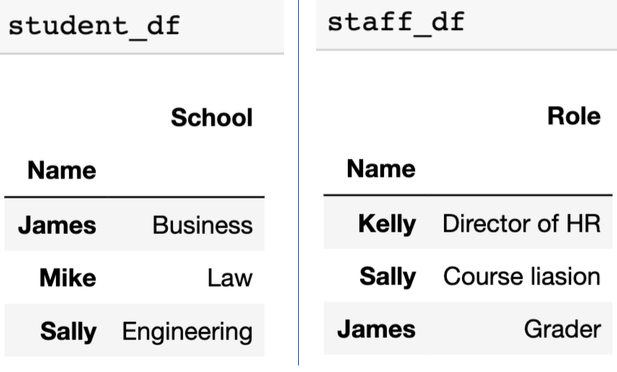

In [1]:
import numpy as np
import pandas as pd

In [2]:
# First we create two DataFrames, staff and students.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# And lets index these staff by name
staff_df = staff_df.set_index('Name')
# Now we'll create a student dataframe
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
# And we'll index this by name too
student_df = student_df.set_index('Name')

In [3]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [4]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [5]:
pd.merge(student_df, staff_df, how='right', left_index=True, right_index=True)

,School,Role
Name,,
Kelly,NaN,Director of HR
Sally,Engineering,Course liasion
James,Business,Grader


In [6]:
# Correct
pd.merge(student_df, staff_df, how='left', left_index=True, right_index=True)

,School,Role
Name,,
James,Business,Grader
Mike,Law,NaN
Sally,Engineering,Course liasion


In [7]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [8]:
# pd.merge(staff_df, student_df, how='right', left_index=False, right_index=True)
print('Wrong! : Must pass left_on or left_index=True')

Wrong! : Must pass left_on or left_index=True


# Q2
Consider a DataFrame named df with columns named P2010, P2011, P2012, P2013, P2014 and P2015 containing float values.  We want to use the apply method to get a new DataFrame named result_df with a new column AVG. The AVG column should average the float values across P2010 to P2015. The apply method should also remove the 6 original columns (P2010 to P2015). For that, what should be the value of x and y in the given code? [PandasIdioms_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/PandasIdioms_ed.ipynb)

In [9]:
df = pd.read_csv('../resources/week-3/datasets/census.csv') \
        .rename(columns={ \
        'POPESTIMATE2010': 'P2010',
        'POPESTIMATE2011': 'P2011',
        'POPESTIMATE2012': 'P2012',
        'POPESTIMATE2013': 'P2013',
        'POPESTIMATE2014': 'P2014',
        'POPESTIMATE2015': 'P2015'}).dropna() \
        [['P2010', 'P2011', 'P2012', 'P2013','P2014', 'P2015']]
#       [['POPESTIMATE2010',
#         'POPESTIMATE2011',
#         'POPESTIMATE2012',
#         'POPESTIMATE2013',
#         'POPESTIMATE2014',
#         'POPESTIMATE2015']] \

df.head()

,P2010,P2011,P2012,P2013,P2014,P2015
0,4785161,4801108,4816089,4830533,4846411,4858979
1,54660,55253,55175,55038,55290,55347
2,183193,186659,190396,195126,199713,203709
3,27341,27226,27159,26973,26815,26489
4,22861,22733,22642,22512,22549,22583


In [10]:
# axis = 1  == axis = 'columns'
x=1
y=1

frames = ['P2010', 'P2011', 'P2012', 'P2013','P2014', 'P2015']
df['AVG'] = df[frames].apply(lambda z: np.mean(z), axis=x)
result_df = df.drop(frames,axis=y)

result_df .head()

,AVG
0,4.823047e+06
1,5.512717e+04
2,1.931327e+05
3,2.700050e+04
4,2.264667e+04


# Q3
Consider the Dataframe df below, instatiated with a list of grades, ordered from best grade to worst. Which of the following options can be used to substitute X in the code given below, if we want to get all the grades between 'A' and 'B' where 'A' is better than 'B'? [Scales](http://localhost:8888/notebooks/Intr2DS/resources/week-3/Scales.ipynb)

In [11]:
import pandas as pd

df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'], index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'], columns = ['Grades'])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [12]:
# Correct
my_categories= pd.CategoricalDtype(categories=['D','D+','C-','C','C+','B-','B','B+','A-','A','A+'], ordered=True)

In [13]:
# my_categories= pd.CategoricalDtype(categories=['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'])
print('ERROE! Unordered Categoricals can only compare equality or not')

ERROE! Unordered Categoricals can only compare equality or not


In [14]:
# my_categories= pd.CategoricalDtype(categories=['D','D+','C-','C','C+','B-','B','B+','A-','A','A+'])
print('ERROE! Unordered Categoricals can only compare equality or not')

ERROE! Unordered Categoricals can only compare equality or not


In [15]:
# my_categories= (['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],ordered=True)
print('SyntaxError: invalid syntax')

SyntaxError: invalid syntax


In [16]:
grades = df['Grades'].astype(my_categories)
result = grades[(grades>'B') & (grades<'A')]
result

excellent    A-
good         B+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

# Q4
Consider the DataFrame df shown in the image below. Which of the following can return the head of the pivot table as shown in the image below df?
[PivotTable_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/PivotTable_ed.ipynb)
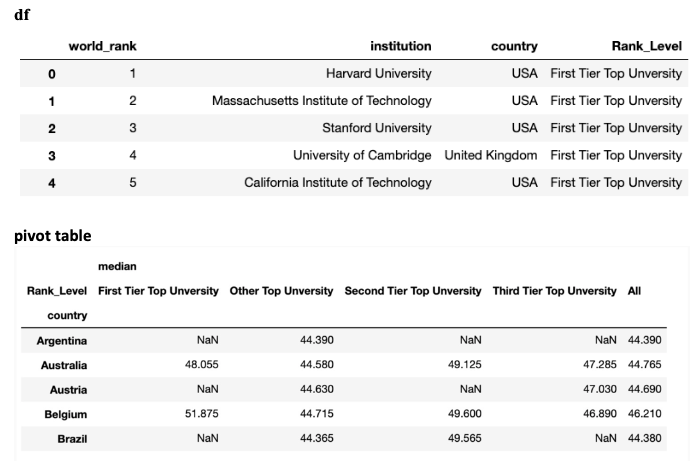

In [17]:
df = pd.read_csv('../resources/week-3/datasets/cwurData.csv')#[['world_rank','institution','country']]
def create_category(ranking):
    # Since the rank is just an integer, I'll just do a bunch of if/elif statements
    if (ranking >= 1) & (ranking <= 100):
        return "First Tier Top Unversity"
    elif (ranking >= 101) & (ranking <= 200):
        return "Second Tier Top Unversity"
    elif (ranking >= 201) & (ranking <= 300):
        return "Third Tier Top Unversity"
    return "Other Top Unversity"

# Now we can apply this to a single column of data to create a new series
df['Rank_Level'] = df['world_rank'].apply(lambda x: create_category(x))
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank_Level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top Unversity
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top Unversity
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top Unversity
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top Unversity
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top Unversity


In [18]:
df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.median]).head()

median                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN              44.390   
Australia                    48.055              44.580   
Austria                         NaN              44.630   
Belgium                      51.875              44.715   
Brazil                          NaN              44.365   

                                                               
Rank_Level Second Tier Top Unversity Third Tier Top Unversity  
country                                                        
Argentina                        NaN                      NaN  
Australia                     49.125                   47.285  
Austria                          NaN                   47.030  
Belgium                       49.600                   46.890  
Brazil                        49.565                      NaN

In [19]:
df.pivot_table(values='score', index='Rank_Level', columns='country', aggfunc=[np.median]).head()

median                                    \
country                   Argentina Australia Austria Belgium  Brazil   
Rank_Level                                                              
First Tier Top Unversity        NaN    48.055     NaN  51.875     NaN   
Other Top Unversity           44.39    44.580   44.63  44.715  44.365   
Second Tier Top Unversity       NaN    49.125     NaN  49.600  49.565   
Third Tier Top Unversity        NaN    47.285   47.03  46.890     NaN   

                                                                    ...  \
country                   Bulgaria Canada   Chile   China Colombia  ...   
Rank_Level                                                          ...   
First Tier Top Unversity       NaN  53.92     NaN  53.430      NaN  ...   
Other Top Unversity         44.335  44.68  44.805  44.395    44.41  ...   
Second Tier Top Unversity      NaN  49.18     NaN  47.960      NaN  ...   
Third Tier Top Unversity       NaN  46.59     NaN  46.740      NaN  ...   

                                                                               \
country                    Sweden Switzerland  Taiwan Thailand  Turkey    USA   
Rank_Level                                                                      
First Tier Top Unversity   51.340      51.465  54.210      NaN     NaN  55.30   
Other Top Unversity        45.280      44.580  44.375    44.69  44.415  44.73   
Second Tier Top Unversity  49.555      48.050     NaN      NaN     NaN  48.89   
Third Tier Top Unversity   46.440      47.930  47.065    46.55     NaN  46.88   

                                                                              
country                   Uganda United Arab Emirates United Kingdom Uruguay  
Rank_Level                                                                    
First Tier Top Unversity     NaN                  NaN         56.000     NaN  
Other Top Unversity        44.28                44.22         44.650  44.255  
Second Tier Top Unversity    NaN                  NaN         49.125     NaN  
Third Tier Top Unversity     NaN                  NaN         46.795     NaN  

[4 rows x 59 columns]

In [20]:
df.pivot_table(values='score', index='Rank_Level', columns='country', aggfunc=[np.median], margins=True).head()

median                                    \
country                   Argentina Australia Austria Belgium  Brazil   
Rank_Level                                                              
First Tier Top Unversity        NaN    48.055     NaN  51.875     NaN   
Other Top Unversity           44.39    44.580   44.63  44.715  44.365   
Second Tier Top Unversity       NaN    49.125     NaN  49.600  49.565   
Third Tier Top Unversity        NaN    47.285   47.03  46.890     NaN   
All                           44.39    44.765   44.69  46.210  44.380   

                                                                    ...  \
country                   Bulgaria Canada   Chile   China Colombia  ...   
Rank_Level                                                          ...   
First Tier Top Unversity       NaN  53.92     NaN  53.430      NaN  ...   
Other Top Unversity         44.335  44.68  44.805  44.395    44.41  ...   
Second Tier Top Unversity      NaN  49.18     NaN  47.960      NaN  ...   
Third Tier Top Unversity       NaN  46.59     NaN  46.740      NaN  ...   
All                         44.335  45.62  44.805  44.440    44.41  ...   

                                                                              \
country                   Switzerland  Taiwan Thailand  Turkey    USA Uganda   
Rank_Level                                                                     
First Tier Top Unversity       51.465  54.210      NaN     NaN  55.30    NaN   
Other Top Unversity            44.580  44.375   44.690  44.415  44.73  44.28   
Second Tier Top Unversity      48.050     NaN      NaN     NaN  48.89    NaN   
Third Tier Top Unversity       47.930  47.065   46.550     NaN  46.88    NaN   
All                            48.265  44.420   44.825  44.415  46.98  44.28   

                                                                               
country                   United Arab Emirates United Kingdom Uruguay     All  
Rank_Level                                                                     
First Tier Top Unversity                   NaN         56.000     NaN  53.705  
Other Top Unversity                      44.22         44.650  44.255  44.600  
Second Tier Top Unversity                  NaN         49.125     NaN  48.990  
Third Tier Top Unversity                   NaN         46.795     NaN  46.815  
All                                      44.22         45.900  44.255  45.100  

[5 rows x 60 columns]

In [21]:
# Correct
df.pivot_table(values='score', index='country', columns='Rank_Level', aggfunc=[np.median], margins=True).head()

median                      \
Rank_Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN              44.390   
Australia                    48.055              44.580   
Austria                         NaN              44.630   
Belgium                      51.875              44.715   
Brazil                          NaN              44.365   

                                                                       
Rank_Level Second Tier Top Unversity Third Tier Top Unversity     All  
country                                                                
Argentina                        NaN                      NaN  44.390  
Australia                     49.125                   47.285  44.765  
Austria                          NaN                   47.030  44.690  
Belgium                       49.600                   46.890  46.210  
Brazil                        49.565                      NaN  44.380

# Q5
Assume that the date '11/29/2019' in MM/DD/YYYY format is the 4th day of the week, what will be the result of the following?
[DateFunctionality_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/DateFunctionality_ed.ipynb)

In [22]:
import pandas as pd
(pd.Timestamp('11/29/2019') + pd.offsets.MonthEnd()).weekday()

5

# Q6
Consider a DataFrame df. We want to create groups based on the column group_key in the DataFrame and fill the nan values with group means using:

filling_mean = lambda g: g.fillna(g.mean())

Which of the following is correct for performing this task? [GroupBy_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/GroupBy_ed.ipynb)

In [23]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,None,2017],
         'Points':[876,789,863,None,741,812,None,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014.0,876.0
1,Riders,2,2015.0,789.0
2,Devils,2,2014.0,863.0
3,Devils,3,2015.0,NaN
4,Kings,3,2014.0,741.0
5,kings,4,2015.0,812.0
6,Kings,1,2016.0,NaN
7,Kings,1,2017.0,788.0
8,Riders,2,2016.0,694.0
9,Royals,4,2014.0,701.0


In [24]:
filling_mean = lambda g: g.fillna(g.mean())
group_key='Team'

In [25]:
# df.groupby(group_key).aggregate(filling_mean)
print('ValueError: Shape of passed values is (4, 5), indices imply (3, 5)')

ValueError: Shape of passed values is (4, 5), indices imply (3, 5)


In [26]:
# df.groupby(group_key).filling_mean()
print("AttributeError: 'DataFrameGroupBy' object has no attribute 'filling_mean'")

AttributeError: 'DataFrameGroupBy' object has no attribute 'filling_mean'


In [27]:
df.groupby(group_key).transform(filling_mean)

,Rank,Year,Points
0,1,2014.0,876.0
1,2,2015.0,789.0
2,2,2014.0,863.0
3,3,2015.0,863.0
4,3,2014.0,741.0
5,4,2015.0,812.0
6,1,2016.0,764.5
7,1,2017.0,788.0
8,2,2016.0,694.0
9,4,2014.0,701.0


In [28]:
# Correct
df.groupby(group_key).apply(filling_mean)

Team  Rank    Year  Points
Team                                   
Devils 2   Devils     2  2014.0   863.0
       3   Devils     3  2015.0   863.0
Kings  4    Kings     3  2014.0   741.0
       6    Kings     1  2016.0   764.5
       7    Kings     1  2017.0   788.0
Riders 0   Riders     1  2014.0   876.0
       1   Riders     2  2015.0   789.0
       8   Riders     2  2016.0   694.0
       11  Riders     2  2017.0   690.0
Royals 9   Royals     4  2014.0   701.0
       10  Royals     1  2014.0   804.0
kings  5    kings     4  2015.0   812.0

# Q7
Consider the DataFrames above, both of which have a standard integer based index. Which of the following can be used to get the data of all students (from student_df) and merge it with their staff roles where nan denotes no role? [MergingDataFrame_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/MergingDataFrame_ed.ipynb)
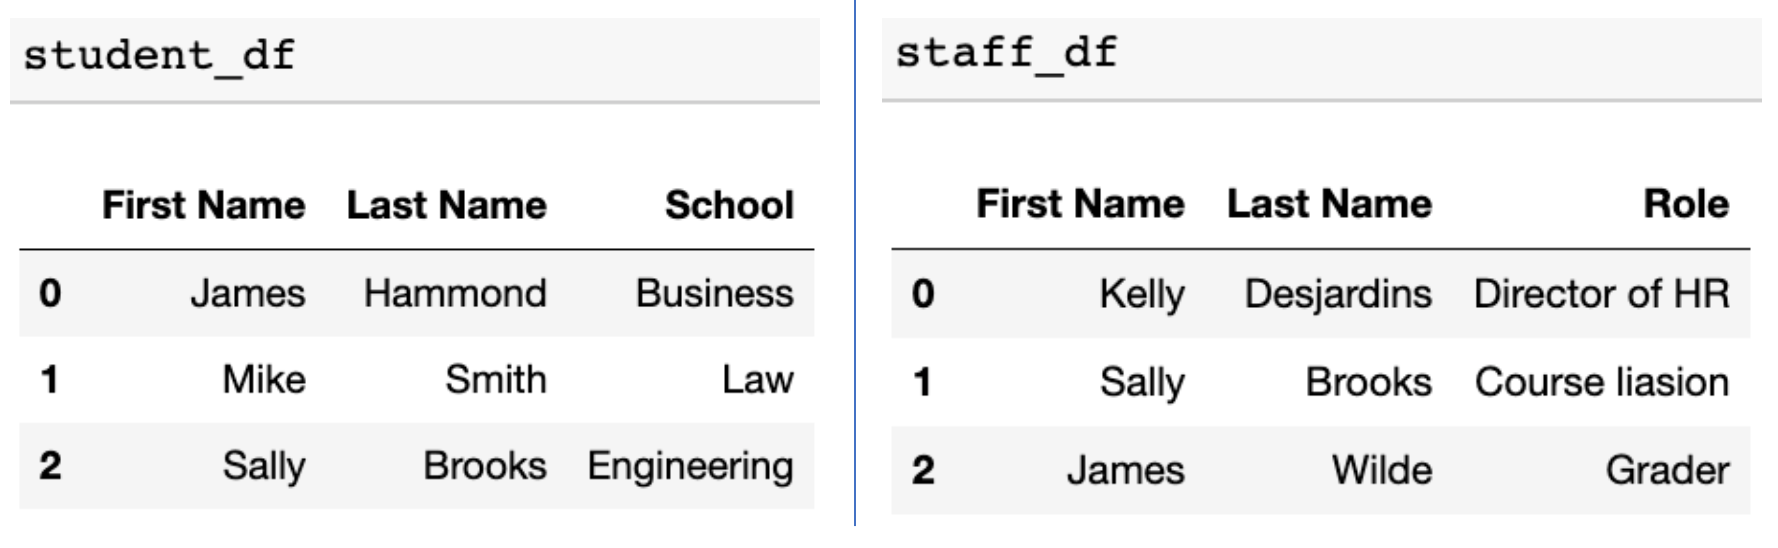 

In [29]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])

In [30]:
student_df

,First Name,Last Name,School
0,James,Hammond,Business
1,Mike,Smith,Law
2,Sally,Brooks,Engineering


In [31]:
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [32]:
pd.merge(staff_df, student_df, how='outer', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,Engineering
2,James,Wilde,Grader,NaN
3,James,Hammond,NaN,Business
4,Mike,Smith,NaN,Law


In [33]:
pd.merge(student_df, staff_df, how='inner', on=['First Name','Last Name'])

,First Name,Last Name,School,Role
0,Sally,Brooks,Engineering,Course liasion


In [34]:
# Correct
pd.merge(staff_df, student_df, how='right', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,James,Hammond,NaN,Business
1,Mike,Smith,NaN,Law
2,Sally,Brooks,Course liasion,Engineering


In [35]:
pd.merge(student_df, staff_df, how='right', on=['First Name','Last Name'])

,First Name,Last Name,School,Role
0,Kelly,Desjardins,NaN,Director of HR
1,Sally,Brooks,Engineering,Course liasion
2,James,Wilde,NaN,Grader


# Q8
Consider a DataFrame df with columns name, reviews_per_month, and review_scores_value. This DataFrame also consists of several missing values. Which of the following can be used to:
 i) calculate the number of entries in the name column, and
 ii) calculate the mean and standard deviation of the reviews_per_month, grouping by different review_scores_value?  [GroupBy_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/GroupBy_ed.ipynb)

In [36]:
df=pd.read_csv("../resources/week-3/datasets/listings.csv")[['name', 'reviews_per_month', 'review_scores_value']]
df.head()

,name,reviews_per_month,review_scores_value
0,Sunny Bungalow in the City,NaN,NaN
1,Charming room in pet friendly apt,1.30,9.0
2,Mexican Folk Art Haven in Boston,0.47,10.0
3,Spacious Sunny Bedroom Suite in Historic Home,1.00,10.0
4,Come Home to Boston,2.25,10.0


In [37]:
df.agg({'name':len,'reviews_per_month':(np.mean,np.std)})

,name,reviews_per_month
,len,reviews_per_month
0,26.0,NaN
1,33.0,NaN
2,32.0,NaN
3,45.0,NaN
4,19.0,NaN
...,...,...
3582,24.0,NaN
3583,37.0,NaN
3584,34.0,NaN


In [38]:
df.agg({'name':len,'reviews_per_month':(np.nanmean,np.nanstd)})

,name,reviews_per_month
,len,reviews_per_month
0,26.0,NaN
1,33.0,NaN
2,32.0,NaN
3,45.0,NaN
4,19.0,NaN
...,...,...
3582,24.0,NaN
3583,37.0,NaN
3584,34.0,NaN


In [39]:
df.groupby('review_scores_value').agg({'name':len,'reviews_per_month':(np.nanmean,np.nanstd)})

name reviews_per_month          
                      len           nanmean    nanstd
review_scores_value                                  
2.0                     7          0.335714  0.431117
3.0                     2          0.185000  0.035355
4.0                    12          0.605833  0.485751
5.0                     2          0.135000  0.007071
6.0                    49          0.848776  1.186384
7.0                    51          0.823333  0.680978
8.0                   334          1.312036  1.593141
9.0                  1130          2.327442  2.253361
10.0                 1177          2.025123  2.145304

In [40]:
df.groupby('review_scores_value').agg({'name':len,'reviews_per_month':(np.mean,np.std)})

name reviews_per_month          
                      len              mean       std
review_scores_value                                  
2.0                     7          0.335714  0.431117
3.0                     2          0.185000  0.035355
4.0                    12          0.605833  0.485751
5.0                     2          0.135000  0.007071
6.0                    49          0.848776  1.186384
7.0                    51          0.823333  0.680978
8.0                   334          1.312036  1.593141
9.0                  1130          2.327442  2.253361
10.0                 1177          2.025123  2.145304

# Q9
What will be the result of the following code?: [DateFunctionality_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/DateFunctionality_ed.ipynb)

In [41]:
import pandas as pd
pd.Period('01/12/2019', 'M') + 5 

Period('2019-06', 'M')

# Q10
Which of the following is not a valid expression to create a Pandas GroupBy object from the DataFrame shown below? [GroupBy_ed](http://localhost:8888/notebooks/Intr2DS/resources/week-3/GroupBy_ed.ipynb)
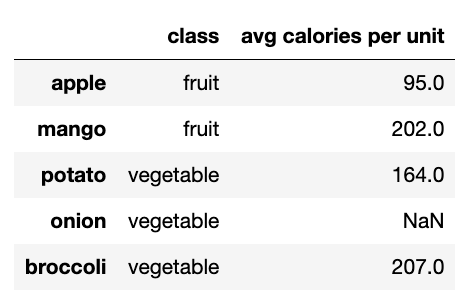

In [42]:
df = pd.DataFrame([{'class': 'fruit', 'avg calories per unit': '95'},
                         {'class': 'fruit', 'avg calories per unit': '202'},
                         {'class': 'vegetable', 'avg calories per unit': '164'},
                         {'class': 'vegetable', 'avg calories per unit': None},
                         {'class': 'vegetable', 'avg calories per unit': '207'},
                        ],['apple','mango','potato','onion','broccoli'])
df

,class,avg calories per unit
apple,fruit,95
mango,fruit,202
potato,vegetable,164
onion,vegetable,None
broccoli,vegetable,207


In [43]:
grouped = df.groupby(['class','avg calories per unit'])
# print(grouped)
# grouped.head()
for group, frame in grouped:
    print(group)

('fruit', '202')
('fruit', '95')
('vegetable', '164')
('vegetable', '207')


In [44]:
grouped = df.groupby('class')
# grouped.head()
for group, frame in grouped:
    print(group)

fruit
vegetable


In [45]:
grouped = df.groupby('class',axis=0)
# grouped.head()
for group, frame in grouped:
    print(group)

fruit
vegetable


In [46]:
df.groupby('vegetable')

KeyError: 'vegetable'